<a href="https://colab.research.google.com/github/AsminiKOD/ClientPredicting/blob/RandomForest/Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Random Forest Model

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE
import pandas as pd

# Load the dataset
file_path = 're-duplicates-handled.csv'
data = pd.read_csv(file_path)

# Drop rows with NaN in the target variable
data.dropna(subset=['y'], inplace=True)

# Separate features and target variable
X = data.drop(columns=['y'])
y = data['y']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE with reduced sampling strategy and neighbors
smote = SMOTE(random_state=42, sampling_strategy=0.4, k_neighbors=7)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Define and train the Random Forest model with optimized hyperparameters
rf_model = RandomForestClassifier(
    random_state=42,
    n_estimators=100,
    max_depth=50,
    min_samples_split=10,
    min_samples_leaf=5,
    max_features='log2',
    class_weight='balanced',
    min_impurity_decrease=0.00001,
    bootstrap=True,
    oob_score=True,
)

rf_model.fit(X_train_resampled, y_train_resampled)

# Evaluate the model on training and testing data
y_train_pred = rf_model.predict(X_train_resampled)
y_test_pred = rf_model.predict(X_test)

y_train_proba = rf_model.predict_proba(X_train_resampled)[:, 1]
y_test_proba = rf_model.predict_proba(X_test)[:, 1]

test_auc = roc_auc_score(y_test, y_test_proba)

train_report = classification_report(y_train_resampled, y_train_pred)
test_report = classification_report(y_test, y_test_pred)

print("Training Set Classification Report:")
print(train_report)

print("Testing Set Classification Report:")
print(test_report)
print(f"Testing Set ROC AUC Score: {test_auc:.3f}")


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Training Set Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.89      0.91     27438
           1       0.75      0.81      0.78     10975

    accuracy                           0.87     38413
   macro avg       0.84      0.85      0.84     38413
weighted avg       0.87      0.87      0.87     38413

Testing Set Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.89      0.91      6859
           1       0.42      0.61      0.50       917

    accuracy                           0.85      7776
   macro avg       0.68      0.75      0.71      7776
weighted avg       0.88      0.85      0.87      7776

Testing Set ROC AUC Score: 0.795


###Visualization

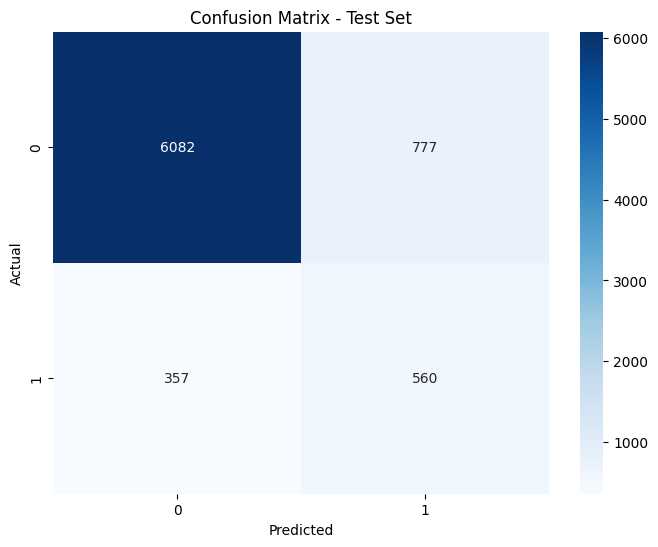

In [7]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix for Test Set
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
